In [1]:
import pandas as pd
import seaborn as sns

In [2]:
path="/Users/rajasekharreddy/Desktop/MLAssignments/accelerometer.csv"

In [3]:
def read_csv(path):
    df=pd.read_csv(path)
    return df
df= read_csv(path)

In [4]:
# To check if null values are present.
df.isna().sum()

wconfid    0
pctid      0
x          0
y          0
z          0
dtype: int64

/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wconfid', ylabel='count'>

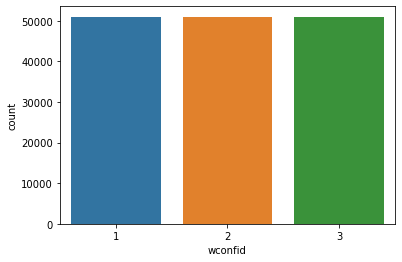

In [5]:
# To check the target species distribution.
sns.countplot(df['wconfid'])

In [6]:
# Extracting the dependent and independent variable.
x= df.iloc[0:,1:5].values
y=df.iloc[0:,0].values

In [7]:
y.shape[0]

153000

In [8]:
x

array([[ 2.000e+01,  1.004e+00,  9.000e-02, -1.250e-01],
       [ 2.000e+01,  1.004e+00, -4.300e-02, -1.250e-01],
       [ 2.000e+01,  9.690e-01,  9.000e-02, -1.210e-01],
       ...,
       [ 1.000e+02,  1.156e+00, -9.400e-02, -2.270e-01],
       [ 1.000e+02,  9.340e-01,  2.030e-01, -1.720e-01],
       [ 1.000e+02,  1.199e+00, -1.760e-01,  1.090e-01]])

In [9]:
y

array([1, 1, 1, ..., 3, 3, 3])

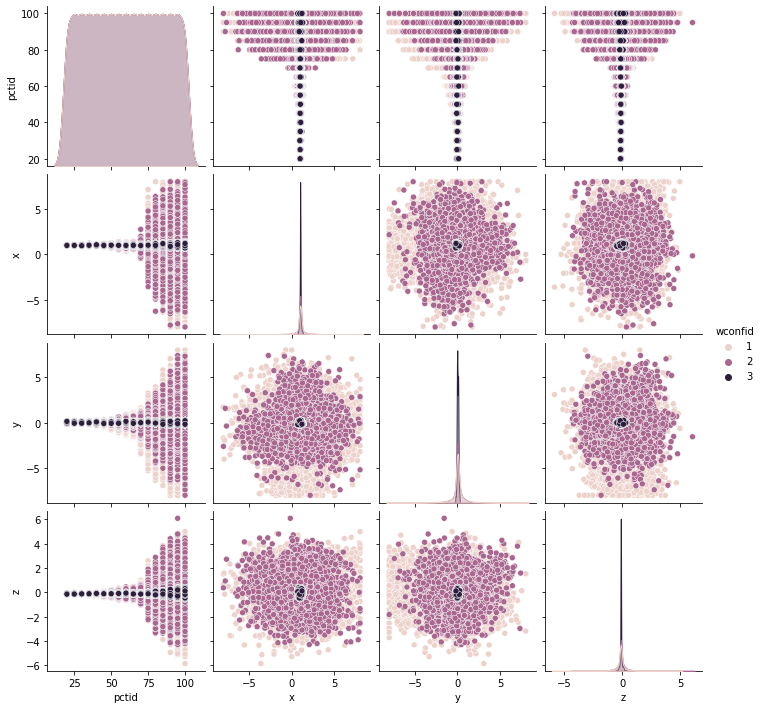

In [8]:
import seaborn as sns
sns.pairplot(df,hue='wconfid')

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve
import numpy as np

# Create an MLP classifier with 4 hidden layers and 2 neurons.

Accuracy scores: [0.33333333 0.33333333 0.57388889 0.43777778 0.34104575]
Mean accuracy: 0.40387581699346403


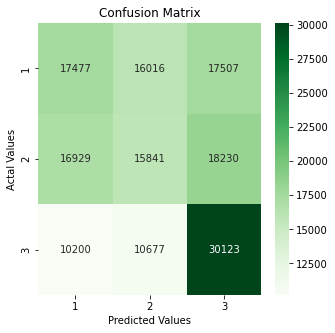

num_classes: 3

Sensitivity_class_0: 0.342686265707016
Specificity_class_0: 0.7340294122695923
F1_score_class_0: 0.36560466175643264

Sensitivity_class_1: 0.3106078505516052
Specificity_class_1: 0.7383038997650146
F1_score_class_1: 0.33872174870071614

Sensitivity_class_2: 0.5906470417976379
Specificity_class_2: 0.6496372818946838
F1_score_class_2: 0.5155399508562158

Overall Accuracy is:  0.4146470588235294


In [11]:

mlp = MLPClassifier(hidden_layer_sizes=(2,2,2,2), max_iter=1000,activation='relu')


# Use cross-validation to evaluate the MLP classifier
scores = cross_val_score(mlp, x, y, cv=5)
mlp.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(mlp, x, y, cv=5)
cm_mlp = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_mlp,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_mlp is the confusion matrix for a multiclass classification problem
num_classes = cm_mlp.shape[0] # 3

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_mlp[i, i]
    FN = np.sum(cm_mlp[i, :]) - TP
    FP = np.sum(cm_mlp[:, i]) - TP
    TN = np.sum(cm_mlp) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)


# Create an MLP classifier with 5 Neurons and 2 hidden layers

Accuracy scores: [0.33663399 0.50643791 0.58124183 0.32924837 0.20130719]
Mean accuracy: 0.3909738562091503


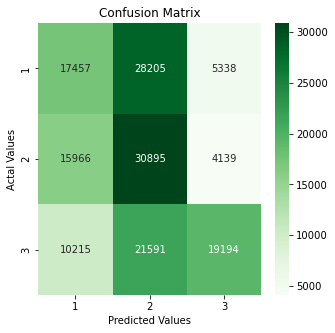

num_classes: 3

Sensitivity_class_0: 0.3422941267490387
Specificity_class_0: 0.7433235049247742
F1_score_class_0: 0.36892158179721285

Sensitivity_class_1: 0.6057842969894409
Specificity_class_1: 0.511803925037384
F1_score_class_1: 0.4692044122997255

Sensitivity_class_2: 0.3763529360294342
Specificity_class_2: 0.9070882201194763
F1_score_class_2: 0.481831532157853

Overall Accuracy is:  0.44147712418300655


In [11]:

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,activation='relu')

# Use cross-validation to evaluate the MLP classifier
scores = cross_val_score(mlp, x, y, cv=5)
mlp.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(mlp, x, y, cv=5)
cm_mlp = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_mlp,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_mlp is the confusion matrix for a multiclass classification problem
num_classes = cm_mlp.shape[0] # 3

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_mlp[i, i]
    FN = np.sum(cm_mlp[i, :]) - TP
    FP = np.sum(cm_mlp[:, i]) - TP
    TN = np.sum(cm_mlp) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)


# Create an MLP classifier with  2 Hidden Layers and 10 Neurons in each layer.

Accuracy scores: [0.32928105 0.49830065 0.67781046 0.68568627 0.24885621]
Mean accuracy: 0.4879869281045751


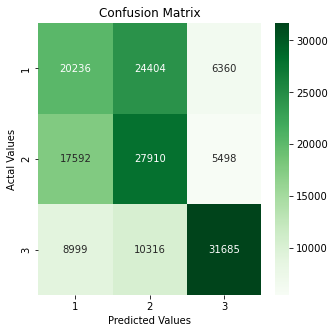

num_classes: 3

Sensitivity_class_0: 0.39678430557250977
Specificity_class_0: 0.7393039464950562
F1_score_class_0: 0.41370990681991193

Sensitivity_class_1: 0.5472549200057983
Specificity_class_1: 0.6596078276634216
F1_score_class_1: 0.4912435171466279

Sensitivity_class_2: 0.6212745308876038
Specificity_class_2: 0.8837450742721558
F1_score_class_2: 0.6702770319962663

Overall Accuracy is:  0.5217712418300654


In [12]:

mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,activation='relu')

# Use cross-validation to evaluate the MLP classifier
scores = cross_val_score(mlp, x, y, cv=5)

mlp.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(mlp, x, y, cv=5)
cm_mlp = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_mlp,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_mlp is the confusion matrix for a multiclass classification problem
num_classes = cm_mlp.shape[0] # 3

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_mlp[i, i]
    FN = np.sum(cm_mlp[i, :]) - TP
    FP = np.sum(cm_mlp[:, i]) - TP
    TN = np.sum(cm_mlp) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)


# Create an MLP classifier with 2  hidden layers and 20 Neurons each layer.

Accuracy scores: [0.33918301 0.53915033 0.61326797 0.7230719  0.66359477]
Mean accuracy: 0.5756535947712418


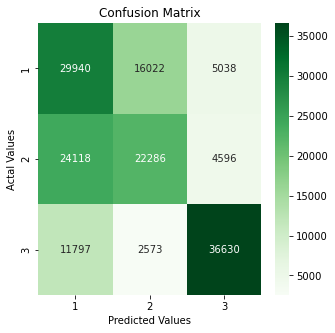

num_classes: 3

Sensitivity_class_0: 0.5870588421821594
Specificity_class_0: 0.64789217710495
F1_score_class_0: 0.5124299351134111

Sensitivity_class_1: 0.43698039650917053
Specificity_class_1: 0.8176960945129395
F1_score_class_1: 0.48510574760074593

Sensitivity_class_2: 0.7182353138923645
Specificity_class_2: 0.9055490493774414
F1_score_class_2: 0.7532077723331173

Overall Accuracy is:  0.5807581699346406


In [13]:

mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=1000,activation='relu')

# Use cross-validation to evaluate the MLP classifier
scores = cross_val_score(mlp, x, y, cv=5)

mlp.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(mlp, x, y, cv=5)
cm_mlp = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_mlp,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_mlp is the confusion matrix for a multiclass classification problem
num_classes = cm_mlp.shape[0] # 3

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_mlp[i, i]
    FN = np.sum(cm_mlp[i, :]) - TP
    FP = np.sum(cm_mlp[:, i]) - TP
    TN = np.sum(cm_mlp) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)


# Create an MLP classifier with 2 hidden layers and 40 Neurons each layer.

Accuracy scores: [0.34964052 0.55313725 0.70745098 0.72153595 0.70941176]
Mean accuracy: 0.608235294117647


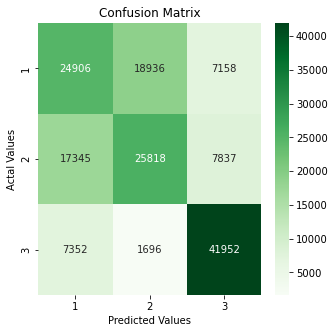

num_classes: 3

Sensitivity_class_0: 0.4883529543876648
Specificity_class_0: 0.7578725218772888
F1_score_class_0: 0.49513434611468193

Sensitivity_class_1: 0.5062353014945984
Specificity_class_1: 0.7977254986763
F1_score_class_1: 0.5298717236938069

Sensitivity_class_2: 0.8225882649421692
Specificity_class_2: 0.8529902100563049
F1_score_class_2: 0.7772703348928615

Overall Accuracy is:  0.6057254901960785


In [14]:

mlp = MLPClassifier(hidden_layer_sizes=(40,40), max_iter=1000,activation='relu')

# Use cross-validation to evaluate the MLP classifier
scores = cross_val_score(mlp, x, y, cv=5)

mlp.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(mlp, x, y, cv=5)
cm_mlp = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_mlp,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_mlp is the confusion matrix for a multiclass classification problem
num_classes = cm_mlp.shape[0] # 3

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_mlp[i, i]
    FN = np.sum(cm_mlp[i, :]) - TP
    FP = np.sum(cm_mlp[:, i]) - TP
    TN = np.sum(cm_mlp) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)



# Create an MLP classifier with 2 hidden layers and 60 Neurons each layer.

Accuracy scores: [0.37300654 0.58372549 0.73846405 0.73120915 0.70130719]
Mean accuracy: 0.6255424836601307


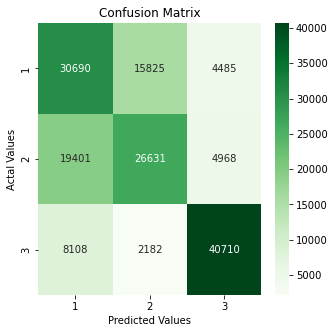

num_classes: 3

Sensitivity_class_0: 0.6017646789550781
Specificity_class_0: 0.730303943157196
F1_score_class_0: 0.5620930600787027

Sensitivity_class_1: 0.5221764445304871
Specificity_class_1: 0.8234607577323914
F1_score_class_1: 0.5569124967810652

Sensitivity_class_2: 0.798235297203064
Specificity_class_2: 0.9073235392570496
F1_score_class_2: 0.8048397057748362

Overall Accuracy is:  0.6407254901960784


In [73]:

mlp = MLPClassifier(hidden_layer_sizes=(60,60), max_iter=1000,activation='relu')

# Use cross-validation to evaluate the MLP classifier
scores = cross_val_score(mlp, x, y, cv=5)

mlp.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(mlp, x, y, cv=5)
cm_mlp = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_mlp,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_mlp is the confusion matrix for a multiclass classification problem
num_classes = cm_mlp.shape[0] # 3

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_mlp[i, i]
    FN = np.sum(cm_mlp[i, :]) - TP
    FP = np.sum(cm_mlp[:, i]) - TP
    TN = np.sum(cm_mlp) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)


# ROC curve for classes with 60 hidden layers.

In [74]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

{0: 0.8183720299884659, 1: 0.7961113033448673, 2: 0.9967165321030372}


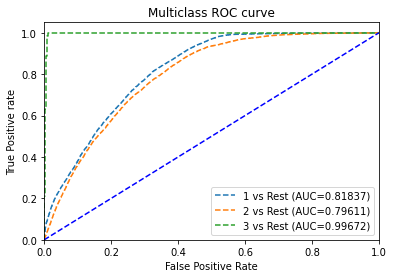

In [75]:
from sklearn.metrics import roc_curve,auc
import numpy as np
from sklearn.preprocessing import label_binarize

# Define the number of folds
n_splits = 5

# Initialize the cross-validation method
cv = StratifiedKFold(n_splits=n_splits)

ML_ROC=OneVsRestClassifier(mlp)
# Initialize the list to store the accuracy scores
scores = []

# Loop over the folds
for train_idx, test_idx in cv.split(x, y):
    # Split the data into training and test sets
    x_train, y_train = x[train_idx], y[train_idx]
    x_test, y_test = x[test_idx], y[test_idx]
    
    # Fit the classifier on the training data
    ML_ROC.fit(x_train, y_train)

    # Evaluate the classifier on the test data and store the score
    y_pred = ML_ROC.predict(x_test)
    pred_prob = ML_ROC.predict_proba(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# print(y_test, y_test_binarized, pred_prob)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 3
classes = [1,2,3]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.5f)'%(classes[i],roc_auc[i]))
print(roc_auc)

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show() 